<a href="https://colab.research.google.com/github/GerardoG2/titanic-project/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Frame The Probem

The goal is to identify what features contributed to the likelihood of survival of those who were aboard the titanic. In other words, who was the most likely to survive.

# Set Up

In [1]:
import pandas as pd

## Download Data

In [2]:
train_url = 'https://raw.githubusercontent.com/ageron/handson-ml2/refs/heads/master/datasets/titanic/train.csv'
test_url = 'https://raw.githubusercontent.com/ageron/handson-ml2/refs/heads/master/datasets/titanic/test.csv'

train_data = pd.read_csv(train_url)
test_data = pd.read_csv(test_url)

# Explore Data

In [6]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The attributes have the following meaning:
* **PassengerId**: a unique identifier for each passenger
* **Survived**: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.
* **Pclass**: passenger class.
* **Name**, **Sex**, **Age**: self-explanatory
* **SibSp**: how many siblings & spouses of the passenger aboard the Titanic.
* **Parch**: how many children & parents of the passenger aboard the Titanic.
* **Ticket**: ticket id
* **Fare**: price paid (in pounds)
* **Cabin**: passenger's cabin number
* **Embarked**: where the passenger embarked the Titanic

In [7]:
train_data = train_data.set_index("PassengerId")
test_data = test_data.set_index("PassengerId")

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


The **age, cabin, and embarked** columns have some null values. With cabin having about 77% values missing.

Now, lets examine the numeric columns.

In [9]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200




*   38% of passengers survived.
*   Average price of the Fare was $32.
*   The mean age was less than 30 years old.



In [10]:
train_data['Survived'].value_counts()

,count
Survived,
0,549
1,342


Lets look at all the categorical attributes.

In [11]:
train_data['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


In [12]:
train_data['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [13]:
train_data['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


# Prepare Data

Now, lets build our preprocessing pipelines - starting with the numeric attributes:

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ("scaler", StandardScaler())
])


Now we can build the pipeline for the categorical attributes:

In [15]:
from sklearn.preprocessing import OneHotEncoder

In [16]:
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("cat_encoder", OneHotEncoder())
])

Finally, lets joijng the numerical and categorical pipelines:

In [17]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]

preprocess_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])


In [18]:
X_train = preprocess_pipeline.fit_transform(
    train_data[num_attribs + cat_attribs]
)
X_train

array([[-0.56573582,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.6638609 ,  0.43279337, -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [-0.25833664, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.10463705,  0.43279337,  2.00893337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25833664, -0.4745452 , -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.20276213, -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  0.        ]])

In [19]:
y_train = train_data['Survived']

We are now ready to train a classifier. Lets start with a RandomForestClassifier:

In [20]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier (n_estimators = 100, random_state = 42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Our model is now trained. Let's use it to make predictions on the test set.

In [21]:
X_test = preprocess_pipeline.transform(test_data[num_attribs + cat_attribs])
y_pred = forest_clf.predict(X_test)

Now lets build a CSV file with the predicitons.

First, lets use cross-validation to see how good our model is.

In [22]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

np.float64(0.8137578027465668)

So, our RandomForest Classifier has an accuracy of **81%**.

Lets try an SVC:

In [23]:
from sklearn.svm import SVC

svm_clf = SVC(gamma = "auto")
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

np.float64(0.8249313358302123)

This model looks a little better.

Lets plot all 10 scores for each model.

/tmp/ipython-input-25-294924937.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([svm_scores, forest_scores], labels = ("SVM", "Random Forest"))


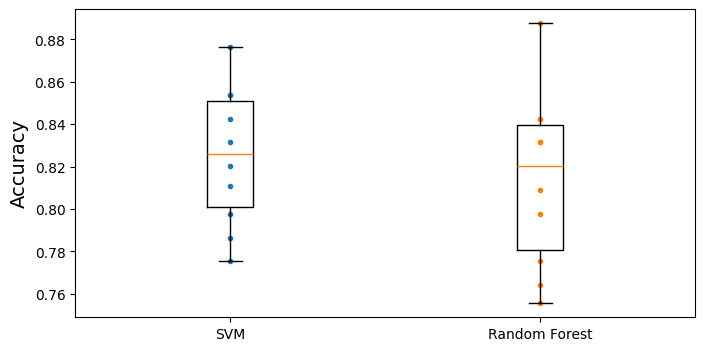

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels = ("SVM", "Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

The random forest classifier got a very high score on one of the 10 folds, but overall it had a lower mean score, as well as a bigger spread, so it looks like the SVM classifier is more likely to generallize well.  

to improve the result further, you could:
* Compare many more models and tune
hyperparameters using cross validation and grid search.
* Do More Feature engineering, for example:
   * Try to convert numerical attributes to categorical attributes: for example, different age groups had very different survival rates, so it may help to create an age bucket category and use it instead of age. Similarly, it may be useful to have a special category for people traveling alone since only 30% of them survived.
   * Replace SibSp and Parch with their Sum.
   * Try to identify parts of names that correlate well with the survived attribute.
   * Use the cabin column, for example take its first letter and treat it as a categorical attribute.